<a href="https://colab.research.google.com/github/AcerPing/tcfst_ML_11C032/blob/main/mlp_tcfst_20221024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tensorflow + keras → tensorflow 2

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


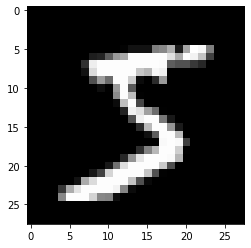

In [ ]:
# 只要matplotlib cmap參數: https://matplotlib.org/stable/tutorials/colors/colormaps.html
import pandas as pd
import matplotlib.pyplot as plt
idx = 0 # 共60,000筆資料，range從0-59,999
plt.imshow(x_train[idx], cmap='gray')
pd.DataFrame(x_train[idx])

In [ ]:
# tensorflow建立模型需要兩個
# 1. 地基(Model): Sequential(一層一層), Model(自由)
# 2. 一層層(Layer): Dense(稠密層/全連接層)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    Dense(128, activation='relu', input_dim=784),
    # 互斥: 比較傾向softmax
    # 不互斥: sigmoid
    Dense(10, activation='sigmoid')
      ]
# 參數計算
# 784 * 128 + 128(bias) = 100,480
# 128 * 10 + 10(bias) = 1290

model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# mse: 可以，但是訓練起來(loss min)很花時間。
# mse在"回歸"時候使用可以，"分類"太花時間。
# 分類: loss → Cross Entropy
# 如果最後只有一個神經元輸出(sigmoid激活) → BinaryCrossEntropy # P * log(1/q) + (1-p)*log(1/(1-q))
# 如果最後是多個神經元輸出(softmax激活) → CategoricalCrossEntropy # P1 * log(1/q1) + P2*log(1/(q2)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
      optimizer='adam',
      metrics=['accuracy']) 


In [ ]:
# One-Hot-Encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 攤平(28*28→784) / Scaling(255.0)
# tensorflow要求輸入值要介於0～1或-1～1
import numpy as np
x_train_norm = x_train.reshape(-1, 784) / 255.0 # input_dim=784 # reshape(60000, 784)
x_test_norm = x_test.reshape(-1, 784) / 255.0 # input_dim=784 # reshape(10000, 784)

In [ ]:
from matplotlib.backend_bases import MouseButton
# batch: 例如.圖片小→100筆一次；圖片大→20筆一次
# 60,000筆資料: 54,000筆資料拿來訓練 / 100 = 540次係數調整
# epochs: 54,000筆資料 要看幾遍 以及 什麼時候要停 → 不要過擬合，val_loss平滑就停止！
# Ex.epochs=10, 540次 * 10epochs = 5,400次係數調整
# verbose: log印多少(1:進度條(預設)、0:無聲、2:除了進度條都有)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
cs = [
    # 存檔
    ModelCheckpoint('mnist.h5', save_best_only=True),
    # 提早停止
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm,
    y_train_cat,
    batch_size=100,
    epochs=30,
    validation_split=0.1,
    callbacks=cs,
    verbose=2)

Epoch 1/30
540/540 - 6s - loss: 0.3469 - accuracy: 0.9046 - val_loss: 0.1520 - val_accuracy: 0.9592 - 6s/epoch - 10ms/step
Epoch 2/30
540/540 - 4s - loss: 0.1567 - accuracy: 0.9552 - val_loss: 0.1144 - val_accuracy: 0.9672 - 4s/epoch - 7ms/step
Epoch 3/30
540/540 - 4s - loss: 0.1120 - accuracy: 0.9677 - val_loss: 0.0929 - val_accuracy: 0.9750 - 4s/epoch - 7ms/step
Epoch 4/30
540/540 - 3s - loss: 0.0863 - accuracy: 0.9751 - val_loss: 0.0847 - val_accuracy: 0.9757 - 3s/epoch - 5ms/step
Epoch 5/30
540/540 - 2s - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0797 - val_accuracy: 0.9772 - 2s/epoch - 4ms/step
Epoch 6/30
540/540 - 2s - loss: 0.0567 - accuracy: 0.9835 - val_loss: 0.0889 - val_accuracy: 0.9748 - 2s/epoch - 3ms/step
Epoch 7/30
540/540 - 2s - loss: 0.0473 - accuracy: 0.9862 - val_loss: 0.0764 - val_accuracy: 0.9782 - 2s/epoch - 4ms/step
Epoch 8/30
540/540 - 2s - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0760 - val_accuracy: 0.9775 - 2s/epoch - 3ms/step
Epoch 9/30
540/540 - 2s

In [ ]:
model.evaluate(x_test_norm, y_test_cat,)

313/313 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9765


[0.07518943399190903, 0.9764999747276306]

In [ ]:
pre = model.predict(x_test_norm).argmax(axis=-1) # 不帶, axis=0, axis=1(axis=-1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

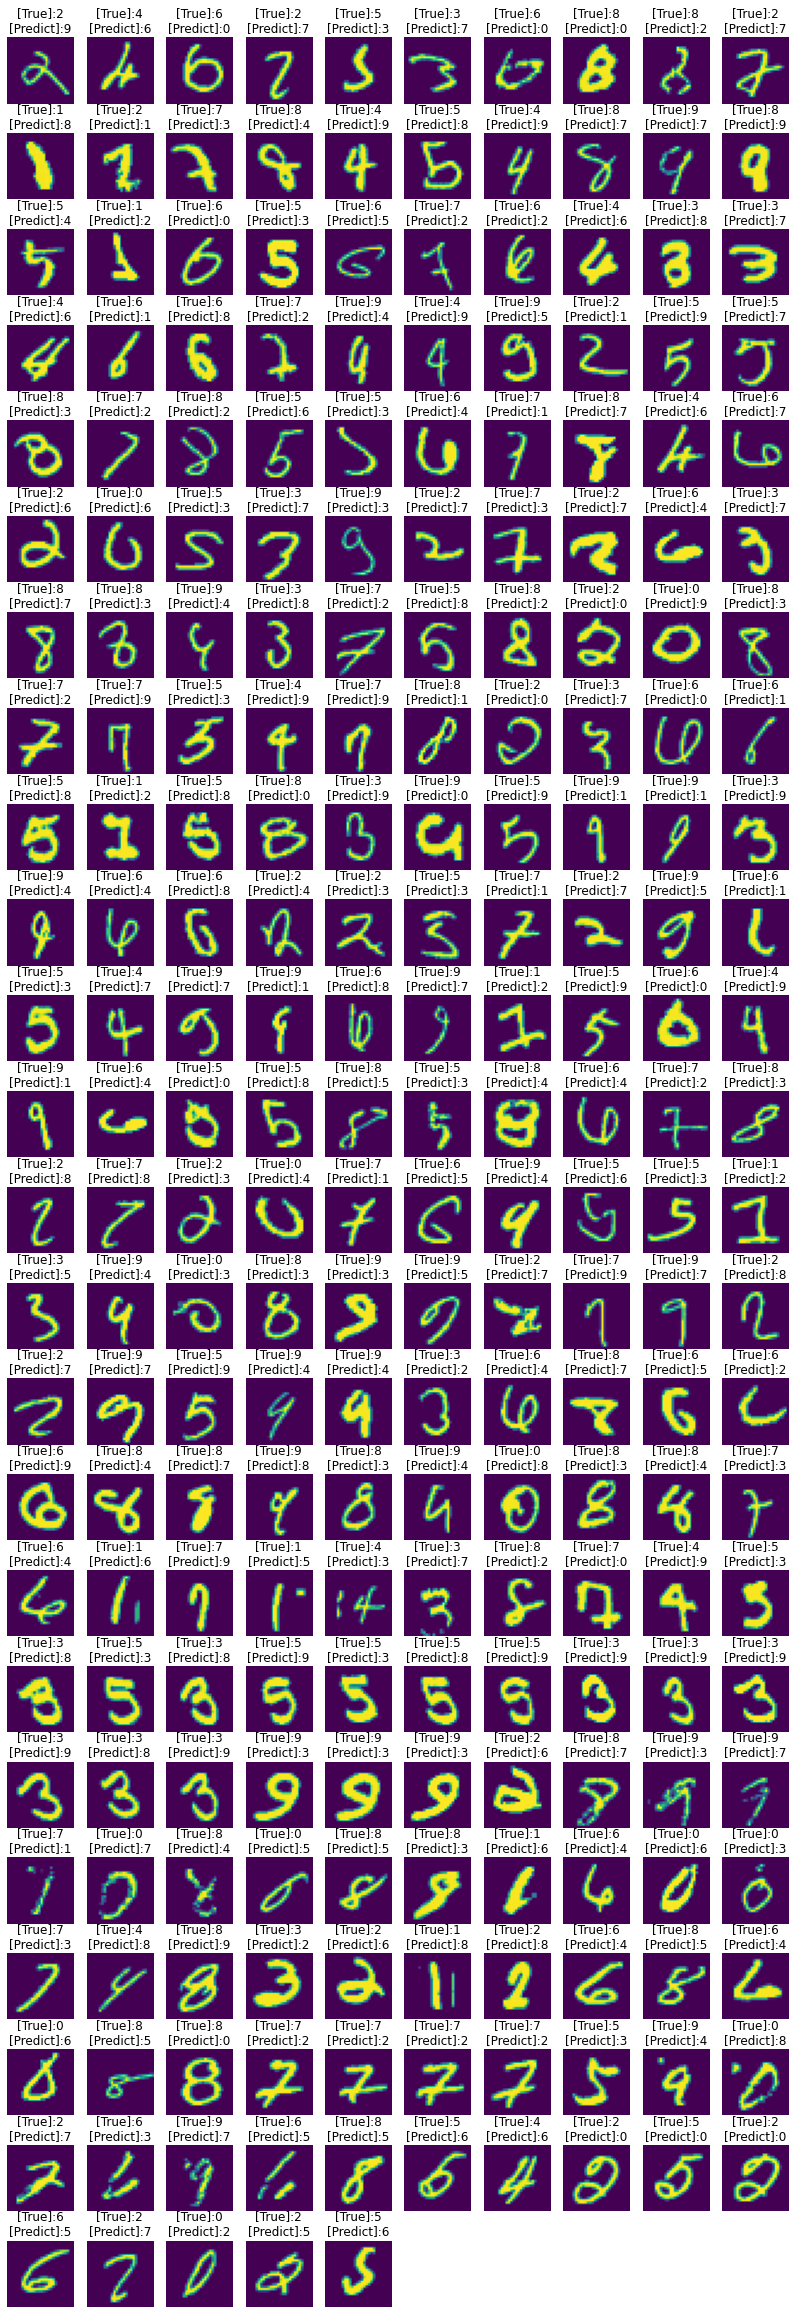

In [ ]:
import matplotlib.pyplot as plt
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10 # 一行擺10個數字
height = len(idx) // width +1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  t = "[True]:{}\n[Predict]:{}".format(false_true[i], false_pre[i])
  plt.title(t)
  plt.axis('off')
  plt.imshow(false_img[i])